In [1]:
import pandas as pd
import json

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../results/multifi/results.csv", index_col=0)
data.set_index("task", inplace=True)
data = data.assign(target=data.groupby(level="task").epoch.max()).reset_index()
data

,task,bracket,epoch,error,submitted,runtime,target
0,0,0,3,0.653231,0.004767,0.026931,3
1,1,0,3,0.460312,0.029179,0.035496,3
2,2,0,3,0.403873,0.037362,0.043219,11
3,2,0,11,0.386737,0.629652,0.638785,11
4,3,0,3,0.408351,0.046475,0.052331,11
...,...,...,...,...,...,...,...
425,300,24,3,0.420977,14.905627,14.911598,11
426,300,24,11,0.393035,15.097634,15.103657,11
427,301,24,3,0.443074,14.971182,14.977388,11
428,301,24,11,0.419956,15.104853,15.110261,11


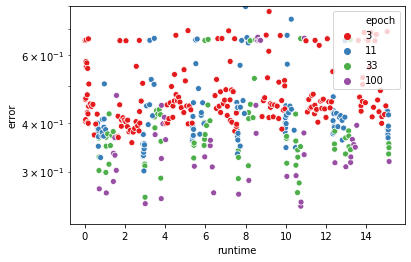

In [3]:
fig, ax = plt.subplots()

sns.scatterplot(x="runtime", y="error", hue="epoch", # units="task", estimator=None, 
                palette="Set1", data=data, ax=ax)

ax.set_ylim(0.22, 0.8)
ax.set_yscale("log")

plt.show()

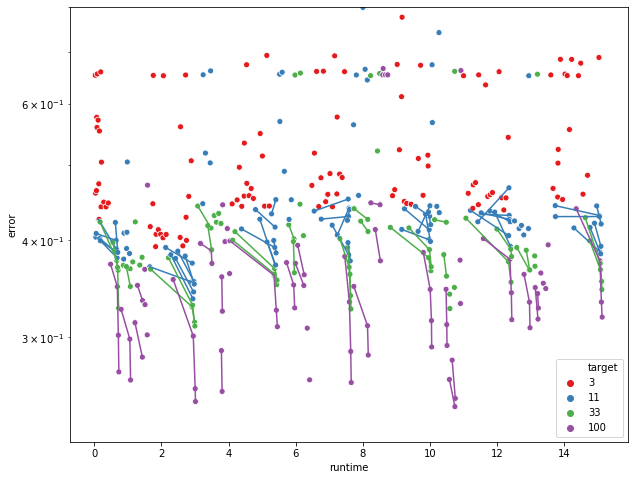

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x="runtime", y="error", hue="target",
                palette="Set1", data=data, ax=ax)
sns.lineplot(x="runtime", y="error", hue="target",
             units="task", estimator=None, legend=False,
             palette="Set1", data=data, ax=ax)

ax.set_ylim(0.22, 0.8)
ax.set_yscale("log")

plt.show()

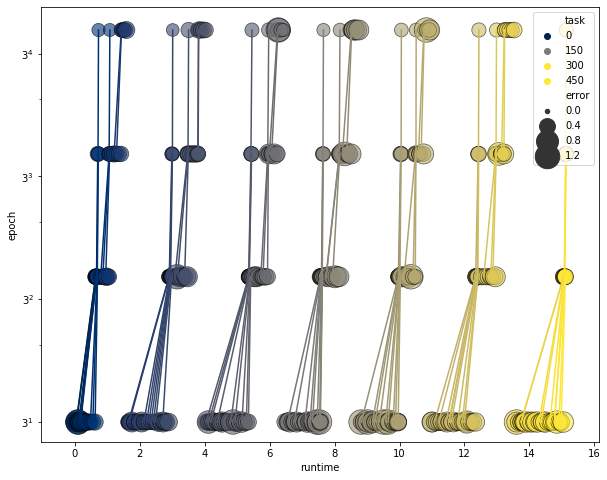

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.lineplot(x="runtime", y="epoch", hue="task", palette="cividis",
             legend=False, data=data, ax=ax)
sns.scatterplot(x="runtime", y="epoch", hue="task", palette="cividis", 
                size="error", sizes=(20, 600), size_norm=(0.0, 1.0), 
                data=data, edgecolor="k", alpha=0.6, ax=ax)

ax.set_yscale('log', basey=3)

plt.show()

In [6]:
data = pd.read_json("../results/multifi/results.json")
data

,regret_validation,regret_test,runtime
0,0.431852,0.438344,23.015457
1,0.238933,0.245053,37.850764
2,0.182494,0.157534,43.067453
3,0.182494,0.157534,58.238535
4,0.182494,0.157534,63.798619
...,...,...,...
425,0.022857,0.020584,27178.103922
426,0.022857,0.020584,27410.905608
427,0.022857,0.020584,27515.422040
428,0.022857,0.020584,27713.022089


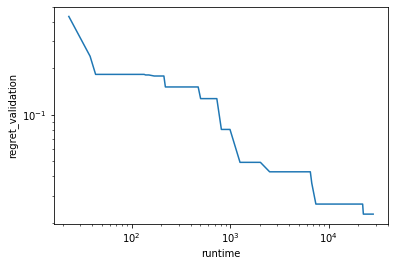

In [7]:
fig, ax = plt.subplots()

sns.lineplot(x="runtime", y="regret_validation", data=data, ax=ax)

ax.set_xscale("log")
ax.set_yscale("log")

plt.show()